# Salary Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

Wczytajmy dane znajdujące się w folderze ./data , plik salary.csv i spojrzmy na ich strukturę

In [2]:
import os

def load_data(filename, FOLDER="./data"):
    csv_path = os.path.join(FOLDER, filename)
    return pd.read_csv(csv_path)

In [3]:
data = load_data("salary.csv")
display(data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Columns are:
 - age: continuous.
 - workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 - fnlwgt: continuous.
 - education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,    10th, Doctorate, 5th-6th, Preschool.
 - education-num: continuous.
 - marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 - occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op- inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 - relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 - race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 - sex: Female, Male.
 - capital-gain: continuous.
 - capital-loss: continuous.
 - hours-per-week: continuous.
 - native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 - salary: <=50K or >50K

Just to make some not obvious things clear:

- The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents.
- education-num - number of years of education

In [4]:
data[data.columns] = data[data.columns].replace(" ?", np.nan)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Widzimy, że w ałym datasecie mamy 32561 wiersze.

W kolumnie workclass mamy 1836 wartości null (5.6%) 

W kolumnie occupation mamy 1843 wartości null (5.7%)

W kolumnie native-country mamy 583 wartości null (1.8%)

In [6]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

Widzimy, że mamy stosunkowo mało wierszy z nullową kollumną native-country. \
Najlepszym i najprostszym podejściem w takiej sytuacji wydaje się być po prostu usunięcie tych rekordów.

In [7]:
data=data[data['native-country'].notna()]

In [8]:
print(data.isna().sum())
print(data.info())

age                  0
workclass         1809
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1816
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31978 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31978 non-null  int64 
 1   workclass       30169 non-null  object
 2   fnlwgt          31978 non-null  int64 
 3   education       31978 non-null  object
 4   education-num   31978 non-null  int64 
 5   marital-status  31978 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    31978 non-null  object
 8   race            31978 non-null  object
 9   sex             31978 non-null  object
 10  

In [9]:
data["occupation"].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

Wartości nullowe w kolumnie occupation wypełnimy wartością domyślną Other-service, a dla wartości nullowych kolumny workclass wprowadzimy nową wartość Other. 

In [10]:
data["occupation"].fillna(value=" Other-service", inplace=True)
data["workclass"].fillna(value=" Other", inplace=True)

print(data["occupation"].value_counts())
print(data["workclass"].value_counts())


 Other-service        5028
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 Other                1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


### Zamienimy kluczy na binarne wartości

In [11]:
data = data.replace([">50K", "<=50K"], [0, 1], regex = True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


### Zrobimy to samo dla innej binarnej kolumny ''sex" 

In [12]:
data = data.replace(["Female", "Male"], [0, 1], regex = True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1


Podzielimy dane na kolumny kategoryczne, numeryczne i binarne

Kolumny numeryczne : age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week \
Kolumny kategoryczne : workclass, education, marital-status, occupation, relationship, race, native-country \
Kolumny binarne : sex, salary

In [13]:
numerical_fields = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
categorical_fields = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "native-country"]
binary_fields = ["sex", "salary"]

## Przyjżyjmy się dokładniej danym numerycznym

In [14]:
data.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
count,31978.000000,3.197800e+04,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1.897141e+05,10.071236,0.668272,1064.360623,86.739352,40.417850,0.759366
std,13.662085,1.057255e+05,2.560667,0.470841,7298.596271,401.594301,12.345285,0.427475
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176202e+05,9.000000,0.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.783120e+05,10.000000,1.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.373790e+05,12.000000,1.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


Najprawdopodobniej będziemy ignorować kolumny capital-gain i kapital-loss z powodu tego, że prawie zawsze mają wartośc 0

In [15]:
print(data["capital-loss"].value_counts())

0       30495
1902      197
1977      163
1887      157
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64


In [16]:
print(data["capital-gain"].value_counts())

0        29320
15024      341
7688       275
7298       242
99999      152
         ...  
1455         1
2538         1
4931         1
22040        1
5060         1
Name: capital-gain, Length: 119, dtype: int64


### Przyjrzyjmy się pozostałym kolumnam numerycznym

In [17]:
print(data["fnlwgt"].value_counts())

123011    13
203488    13
148995    12
164190    12
121124    12
          ..
228806     1
161063     1
253752     1
274800     1
257302     1
Name: fnlwgt, Length: 21406, dtype: int64


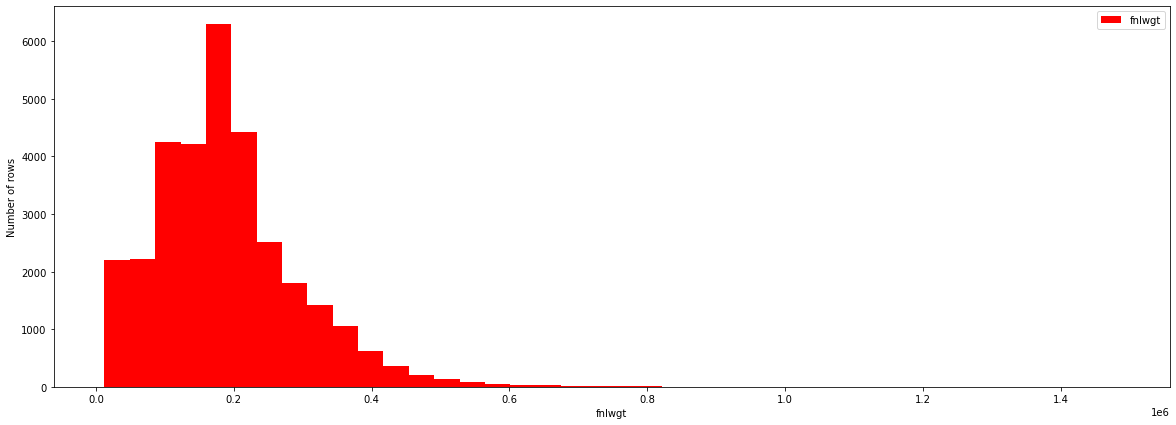

In [18]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['fnlwgt'], bins=40, color="red", label='fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

#### popatrzmy jak jest rozpodzielony wiek w naszy datasecie

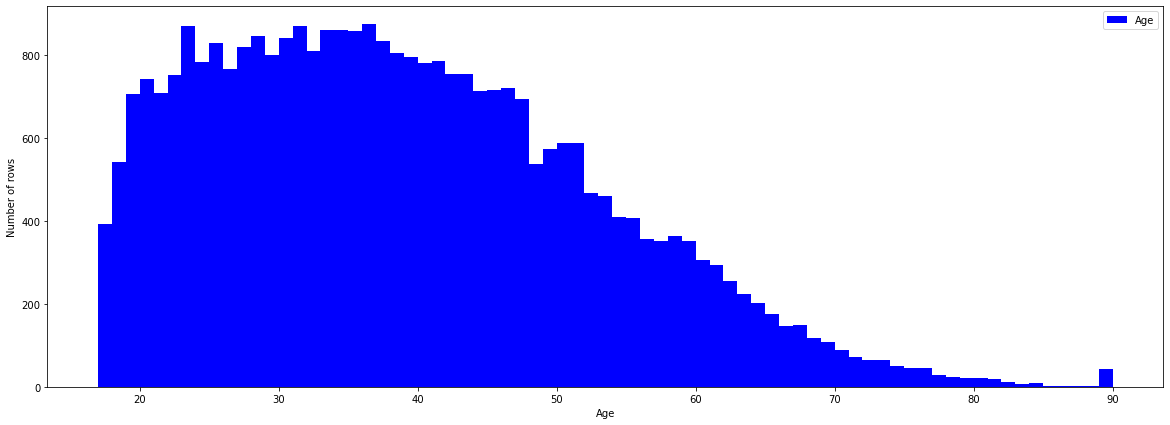

In [19]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['age'], bins=73, color="blue", label='Age')
plt.xlabel('Age')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

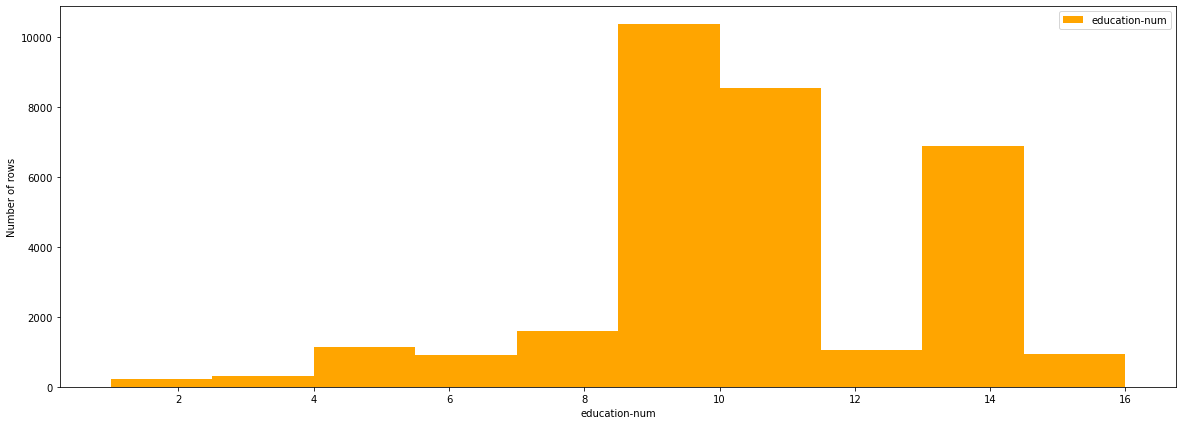

In [20]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['education-num'], bins=10, color="orange", label='education-num')
plt.xlabel('education-num')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

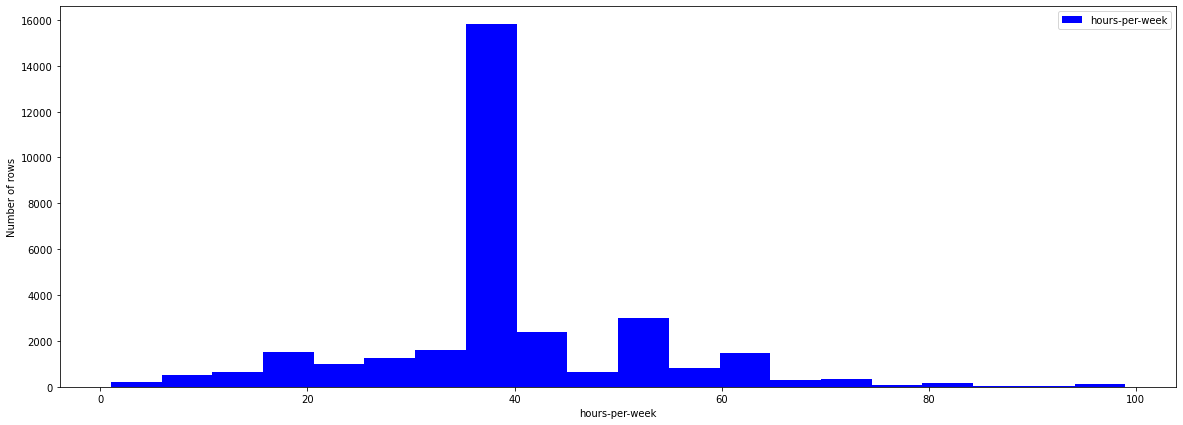

In [21]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['hours-per-week'], bins=20, color="blue", label='hours-per-week')
plt.xlabel('hours-per-week')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

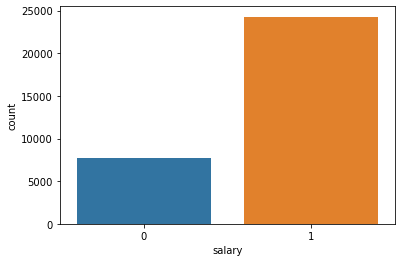

In [22]:
import seaborn as sns 
sns.countplot(data["salary"])

Widzimy, że klasa negatywna i pozytywna są przedstawione w datasecie w różnych proporscjach, więc musimy pamiętać, aby koniecznie używać StratifiedKFold().

Resztę pozostawiamy bez zmian 

## Przyjrzyjmy się kolumnam kategorycznym

In [23]:
print(data["workclass"].value_counts())

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 Other                1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [24]:
print(data["education"].value_counts())

 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: education, dtype: int64


In [25]:
print(data["marital-status"].value_counts())

 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: marital-status, dtype: int64


In [26]:
print(data["occupation"].value_counts())

 Other-service        5028
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64


In [27]:
print(data["relationship"].value_counts())

 Husband           12947
 Not-in-family      8156
 Own-child          5005
 Unmarried          3384
 Wife               1534
 Other-relative      952
Name: relationship, dtype: int64


In [28]:
print(data["race"].value_counts())

 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
 Amer-Indian-Eskimo      311
 Other                   253
Name: race, dtype: int64


In [29]:
print(data["native-country"].value_counts())

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

Będziemy brać pod uwagę wszystkie kolumny kategoryczne. 

### Stworzymy DataFrame Selector

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Zbudujmy pipeline dla atrybutów numerycznych

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numerical_fields = ["age", "fnlwgt", "education-num", "hours-per-week"]

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(numerical_fields)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

Imputer dla kategorycznych kolumn

In [34]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

Zbudujmy pipeline dla atrybutów kategorycznych

In [35]:
from sklearn.preprocessing import OneHotEncoder

catbin = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "native-country", "sex"]

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(catbin)),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

In [36]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

## Podzielimy zbiór danych na X i y

In [37]:
X = data.drop(['salary'], axis=1)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States


In [38]:
y = data['salary'].values
y

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Podzielimy zbiór danych na train i test

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [40]:
num_pipeline.fit_transform(X_train)

array([[3.70000e+01, 1.90759e+05, 1.00000e+01, 6.00000e+01],
       [2.00000e+01, 5.63220e+04, 1.00000e+01, 2.50000e+01],
       [2.60000e+01, 2.91968e+05, 1.50000e+01, 4.00000e+01],
       ...,
       [5.90000e+01, 1.57305e+05, 1.00000e+00, 4.00000e+01],
       [4.70000e+01, 5.52720e+04, 1.00000e+01, 4.00000e+01],
       [4.80000e+01, 2.39058e+05, 8.00000e+00, 5.00000e+01]])

In [41]:
cat_pipeline.fit_transform(X_train)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

# Płytkie uczenie

In [42]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='rbf'))])

param_grid = {
            'classifier__gamma': [0.1, 1],
            'classifier__C': [0.01, 0.1, 1]
}
grid_1 = GridSearchCV(pipe, param_grid, cv=kfold)
grid_1.fit(X_train, y_train)
grid_1.best_params_

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LogisticRegression())])

param_grid = {
            'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none']
}
grid_4 = GridSearchCV(pipe, param_grid, cv=kfold)
grid_4.fit(X_train, y_train)
grid_4.best_params_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The s

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The s

{'classifier__C': 0.01, 'classifier__penalty': 'l2'}

In [44]:
from sklearn import  metrics

models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('Logistic', grid_4.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
precision_score: 0.752542372881356
recall_score: 1.0
f1_score: 0.8588007736943907
accuracy_score: 0.752542372881356
